<h1>PCA(Principal Component Anlaysis)의 이해</h1><br>

차원 축소의 대표적인 기법.

<b>부분 공간으로 투영한다는게 핵심</b>

기술적인 이슈: 원본데이터의 정보량을 최소한으로 훼손시키면서 어떻게 차원축소를 할 것이냐는 것.

<img src="./img/PCA.png"/>

<h2>PCA(Principal Component Anlaysis)의 이해</h2><br>

PCA는 원본 데이터가 피쳐들 상호간에 상관관계가 있다고 가정을하고 수행하는 방식. 

가장 상관관계가 큰 방향으로 축 만들고 그 다음 큰 방향으로 축을 만들고.

여기서는 가장 큰 상관관계가 있는 축 하나를 가지고 설명함.

원본데이터가 키가 있고 몸무게가 있다고 한다면 키가 커지면서 몸무게가 커지는 우상향되는 관계도를 가지고 있음.

데이터 변동성이 가장 큰 방향으로 축 생성 후 에 키 몸무게 축에 원본 데이터를 맵핑함.

새로운 축으로 데이터를 표현하면 B가 되고

살짝 돌려서 보면 C로 1차원 축에 맵핑을 하여 축소가 됨.

<img src="./img/PCA2.png"/>

<h2>PCA(Principal Component Anlaysis)의 이해</h2><br>

First Principal에 첫번째 축을 생성.

Second Principal에 두번째 축을 생성.

두번째 축은 첫번째 PCA 축에 **직각**이 되는 방향임

가령 오른쪽 과 같은 그림의 데이터 셋이 있다고 할때

가로로 가장 변동성이 큼 (PC1)

두번째는 직각(PC2)


<img src="./img/PCA3.png"/>

<h1>PCA 변환</h1><br>

공분산 행렬을 구하고 공분산 행렬은 대칭 행렬이기 때문에 고유 벡터와 고유값으로 분해가 될 수 있다. 이렇게 구한 고유 벡터를 원본 데이터로 선형 변황을 시키면 PCA 변환 값이 도출 된다.

뒷장에 선형대수에 대한 여러 용어들이 나오는데 100%이해할 필요는 없고 

중요한 것은 PCA 변환은 원본 데이터에 대해서 공분산 행렬을 추출하고 그렇게 추출한 행렬은 고유벡어톼 고유값으로 분해가 되고 그 고유벡터를 이용해서 그 고유벡터가 PCA축이 되는 것이다. 

그래서 그 축에 투영을 하면 PCA 변환이 되는 것임.

<img src="./img/PCA4.png"/>

<h1>공분산 행렬</h1><br>

분산: 보통은 한 개의 특정 변수의 데이터 값들의 변동을 의미함( 어느정도 분산 되어 있나. 반에서 키는 평균에서 어느정도 분산되어 있나)
공분산의 공은 빌 공(空)자가 아니라 함께 공(共)이다. 두 변수간의 변동을 의미함.

X와 X와의 행렬은 자기 분산임. 공분산 행렬은 정방향 행렬. 정방향 행렬이란 행과 열의 크기가 같은 것. 

<img src="./img/CovarianceMatrix.png"/>

<h1>선형 변환과 고유 벡터/고유값</h1><br>

빨간 원본 공간이 있으면 이 원본 벡터들을 또다른 행렬 공간에 맵핑을 해서 변환하는 것을 선형 변환이라고 함. 

이렇게 고유 벡터는 선형변환을 했을때 원본 벡터가 방향성이 안바뀌고 크기만 바뀜. 이런걸 고유 벡터라고 지칭함.

<img src="./img/eigenvector.png"/>

<h1>공분산 행렬의 고유값 분해</h1><br>

공분산 행렬은 대칭행렬이라고 했는데 대칭행렬은 고유값 분해와 관련해서 매우 좋은 특성이 있다.

고유 벡터를 직교행렬, 정방향행렬로 만들 수 가 있다. 

왼쪽 식 원래 행렬 P의 전치행렬을 선형대수 식을 거치면 오른쪽 식으로 공분산 행렬이 고유벡터 고유 값으로 분해가 된다.


<img src="./img/CovarianceMatrix2.png"/>

<h1>PCA변환과 수행 절차</h1><br>

<img src="./img/PCAProcess.png"/>

### PCA 개요 

사이킷런 PCA

<img src="./img/sklearnPCA.png"/>

**사이킷런의 PCA를 이용해 아이리스 데이터를 분석**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환해서 한번 보기. 4개의 피쳐와 1개의 타겟값으로 되어 있음.
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

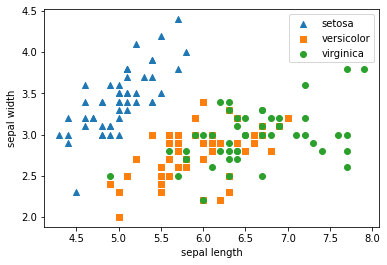

In [2]:
#setosa는 (^)세모, versicolor는 (square)네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

위 그림을 보면 원본 데이터를 직관적으로 이렇게 생겼구나라고 알 수는 있는데 이게 축을 기준으로 하면 사실 명확하게 끄집어내긴 힘들다.


그냥 봐서 대강 어떻게 클러스터하면 될지 보이긴한다.

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

PCA하기전에 standard scaler로 피쳐 세트를 변환을 아래와 같이 할 것임.

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
iris_scaled.shape

(150, 4)

**PCA 변환 수행**

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환. fit.trnasform하거나 fit 후 transform을 개별적으로 할 수 있다.
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


(150,2) 로 변환 되었음.

In [8]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


PCA component에 따라서 위와같이 변화 되었다.

**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

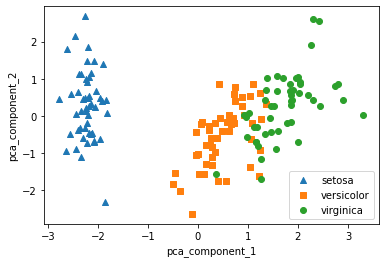

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

위의 결과를 보면 이전보다 훨씬 더 명확하게 클러스터 되어 있다. 특히 세토사는 완벽하게 분리되어 있다.

가상의 축을 만들고 왼쪽으로 회전했다고 생각하면 알 수 있다.

**각 PCA Component별 변동성 비율**

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


위의 결과를 보면 전체 변동의 72퍼센트가 첫번재 축을 설명할 수 있고 두번째 축은 약 23퍼센트로 설명할 수 있다.

**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


위는 정확도 기반으로 확인해본 것.

In [12]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88


### 신용카드 데이터 세트 PCA 변환

**데이터 로드 및 컬럼명 변환**

In [21]:
import pandas as pd

# 엑셀 파일이므로 read_csv 말고 read_excel로 해야함. 판다스에 있음.
sssdf = pd.read_excel('pca_credit_card.xls', sheet_name='Data', header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


위의 결과를 보면 ID 칼럼과 target칼럼을 포함해서 25개 칼럼이 있다. 

default payment next month 이게 1이면 연체한 것. 0이면 안한 것.

다양한 속성들이 있는데 매월 별로 있기 때문에 많긴 하지만

상관도를 제외한 속성을 보면 그렇게 많진 않다.

중간에 PAY_0, PAY_2 ... 이렇게 있는데

숫자 순서가 안맞아서 PAY_0을 PAY_1로 바꿀 것임. 

그리고 ID , 타겟 칼럼 드롭할 것임.

In [22]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
# ID, default 컬럼 Drop
X_features = df.drop(['ID','default'], axis=1)

In [23]:
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [24]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

Null값이 없고 다 int형이다. 피쳐들별로 상관도가 높을것 같은 느낌이 든다. 시각화해보자

**피처간 상관도 시각화**

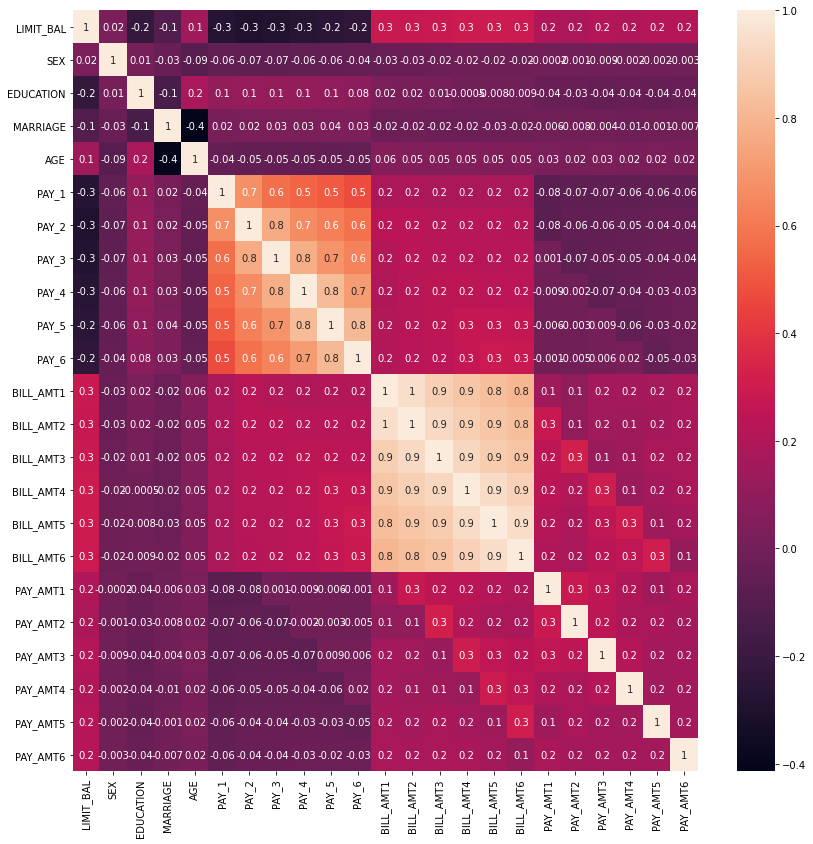

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


위의 결과를 보면 PAY들도 상관도가 높고 BILL은 더 높다.

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

상관도가 높은 컬럼들은 차원 축소 효율이 굉장히 좋다.

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성(이 6개는 상관도가 엄청 높다)
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


**원본 데이터 세트와 6개 컴포넌트로 PCA 변환된 데이터 세트로 분류 예측 성능 비교**

랜덤포레스트 기반에서 분류 예측을 해보자.

In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


이번에는 PCA 변환을 해보고 그걸 기반으로 예측 수행

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7906 0.7977 0.8011]
PCA 변환 데이터 셋 평균 정확도:0.7965


26개의 피쳐들을 6개의 컴포넌트만 가지고도 이렇게 잘 예측했다는 것은 PCA가 굉장히 뛰어난 압축효과를 갖고 있는 차원축소 기법임을 알 수 있다. 

특히 이렇게 상관도가 높은 많은 칼럼들을 가지고 있을때 PCA는 굉장히 적은 차원으로 원본데이터를 유지하면서 압축을 할 수 있는 효과적인 방법이다.